# Regression with Deep Neural Network (DNN)


In a regression problem, the aim is to predict the output of a continuous value, like a energy consumption, a temperature value or a probability.

This file demonstrates how to build models to predict the energy efficiency of the MAU system. To do this, you will provide the models with a description of many MAUs from that a certain period. This description includes attributes like temperature, humidity, airflow, and enthalpy.

In [5]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [7]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


## Load all MAU entrance data (340 counts)

In [9]:
# Load entrance data
data_entrance = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/MAU_paper/interpolated_data_entrance_340.csv', encoding='unicode_escape')
#data_entrance=pd.read_csv(r'C:\Users\Hsiao-ping.ni\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\interpolated_data_entrance_340.csv', encoding='unicode_escape')
#data_entrance=pd.read_csv(r'C:\Users\nick8\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\interpolated_data_entrance_340.csv', encoding='unicode_escape')
data_entrance

,ï»¿Date,Temperature (Â°F),Humidity (%),Density (g/m3),"Enthalpy, h (kJ/kg)",x (g/kg)
0,22-Feb-24,73.990000,31.990000,6.730000,38.080000,5.680000
1,22-Feb-24,74.622920,31.448171,6.719617,38.432566,5.679056
2,22-Feb-24,75.255841,30.906342,6.709233,38.785133,5.678112
3,22-Feb-24,75.888761,30.364513,6.698850,39.137699,5.677168
4,22-Feb-24,76.521681,29.822684,6.688466,39.490265,5.676224
...,...,...,...,...,...,...
335,4-Apr-24,87.375858,7.891475,2.500413,36.644631,2.157758
336,4-Apr-24,87.211894,7.906106,2.485310,36.520973,2.148319
337,4-Apr-24,87.047929,7.920737,2.470206,36.397316,2.138879
338,4-Apr-24,86.883965,7.935369,2.455103,36.273658,2.129440


## Load all MAU exit data (340 counts)

In [11]:
# Load exit data
data_exit = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/MAU_paper/interpolated_data_exit_340.csv', encoding='unicode_escape')
#data_exit=pd.read_csv(r'C:\Users\Hsiao-ping.ni\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\interpolated_data_exit_340.csv', encoding='unicode_escape')
#data_exit=pd.read_csv(r'C:\Users\nick8\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\interpolated_data_exit_340.csv', encoding='unicode_escape')
data_exit

,ï»¿Date,Temperature (Â°F),Humidity (%),Density (g/m3),"Enthalpy, h (kJ/kg)",x (g/kg)
0,22-Feb-24,75.038000,38.790000,8.400000,42.380000,7.170000
1,22-Feb-24,75.035451,38.760265,8.394336,42.364425,7.163864
2,22-Feb-24,75.032903,38.730531,8.388673,42.348850,7.157729
3,22-Feb-24,75.030354,38.700796,8.383009,42.333274,7.151593
4,22-Feb-24,75.027805,38.671062,8.377345,42.317699,7.145457
...,...,...,...,...,...,...
335,4-Apr-24,75.175204,39.546401,8.624484,42.920088,7.343923
336,4-Apr-24,75.176903,39.632301,8.643363,42.962566,7.360442
337,4-Apr-24,75.178602,39.718201,8.662242,43.005044,7.376962
338,4-Apr-24,75.180301,39.804100,8.681121,43.047522,7.393481


## Split the data into training and test sets

Now, split the dataset into a training set and a test set. You will use the test set in the final evaluation of your model.

The line of code "train_dataset = dataset.sample(frac=0.8, random_state=0)" creates a training dataset by randomly selecting 80% of the rows from the dataset, ensuring that the selection is reproducible by setting a random state. The frac=0.8 parameter specifies that 80% of the data should be sampled, and random_state=0 ensures that the random selection of rows is consistent every time the code is run, facilitating reproducible results in experiments or analyses.

The line "test_dataset = dataset.drop(train_dataset.index)" removes all rows from dataset that are already included in train_dataset, effectively creating a test dataset. This is achieved by dropping rows indexed in train_dataset.index from the original dataset. The result is a dataset containing 20% of the original data, not selected for training, used for testing model performance.

### Train datasets for MAU entrance (272 counts)

Drop 'Count' and 'Which MAU' columns.

In [16]:
data_entrance = data_entrance.drop(['ï»¿Date'], axis=1)
train_dataset_entrance = data_entrance.sample(frac=0.8, random_state=0)
test_dataset_entrance = data_entrance.drop(train_dataset_entrance.index)
train_dataset_entrance

# Spliting data into Feature 
#X=data[['Humidity (%)','Airflow (g/m^3)','Enthalpy, h (kJ/kg)','x (g/kg)']]
#y=data['Temperature (°F)']

# Import train_test_split function
#from sklearn.model_selection import train_test_split

# Split dataset into training set and test (validation) set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # 80% training and 20% test

,Temperature (Â°F),Humidity (%),Density (g/m3),"Enthalpy, h (kJ/kg)",x (g/kg)
225,82.432389,21.558938,5.652301,40.698496,3.853363
271,90.741540,7.450619,2.586018,38.676224,2.266018
204,89.065664,13.234513,4.388584,41.770177,3.828584
274,90.736442,7.531327,2.615752,38.732861,2.295752
299,89.123186,7.933009,2.715605,38.121829,2.302242
...,...,...,...,...,...
143,86.009853,14.939794,4.431357,40.262330,3.841121
180,87.637345,13.710442,4.404867,41.029646,3.789381
131,82.056578,20.541209,5.473481,40.132065,4.702006
302,89.293947,7.886283,2.722684,38.225192,2.305074


### Test datasets for MAU entrance (68 counts)

In [18]:
test_dataset_entrance

,Temperature (Â°F),Humidity (%),Density (g/m3),"Enthalpy, h (kJ/kg)",x (g/kg)
9,79.686283,27.113540,6.636549,41.253097,5.671504
25,87.581740,20.427227,6.524395,45.683156,5.674395
28,87.724749,20.362094,6.535723,45.787935,5.685723
31,87.867758,20.296962,6.547050,45.892714,5.697050
32,87.915428,20.275251,6.550826,45.927640,5.700826
...,...,...,...,...,...
315,90.033912,7.683805,2.753363,38.673097,2.317345
323,89.343434,7.715900,2.681652,38.128525,2.271032
325,89.015504,7.745162,2.651445,37.881209,2.252153
327,88.687575,7.774425,2.621239,37.633894,2.233274


### Load original entrance data

In [20]:
# Load entrance data
ori_data_entrance = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/MAU_paper/AI_model_MAU_Entrance.csv', encoding='unicode_escape')
#ori_data_entrance=pd.read_csv(r'C:\Users\Hsiao-ping.ni\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\AI_model_MAU_Entrance.csv', encoding='unicode_escape')
#ori_data_entrance=pd.read_csv(r'C:\Users\nick8\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\AI_model_MAU_Entrance.csv', encoding='unicode_escape')
ori_data_entrance

,Count,Which MAU,Temperature (°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
0,1,1,73.990,31.99,6.73,38.08,5.68
1,2,2,87.400,20.51,6.51,45.55,5.66
2,3,3,88.410,20.05,6.59,46.29,5.74
3,4,4,87.370,20.35,6.45,45.39,5.60
4,5,5,87.330,20.63,6.51,45.59,5.66
5,6,9,75.540,29.08,6.44,38.33,5.46
6,7,1,80.780,22.35,5.81,40.09,4.98
7,8,1,87.760,12.46,3.97,40.32,3.46
8,9,1,85.660,14.32,4.39,39.87,3.72
9,10,3,89.650,13.09,4.42,42.21,3.86


### Original test datasets for MAU entrance (3 counts)

In [22]:
ori_test_entrance = ori_data_entrance.iloc[[5, 12, 15]]
ori_test_entrance

,Count,Which MAU,Temperature (°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
5,6,9,75.540,29.08,6.44,38.33,5.46
12,13,2,90.770,7.00,2.42,38.36,2.10
15,16,5,90.194,7.64,2.76,38.77,2.32


### Train datasets for MAU exit (272 counts)

In [24]:
data_exit = data_exit.drop(['ï»¿Date'], axis=1)
train_dataset_exit = data_exit.sample(frac=0.8, random_state=0)
test_dataset_exit = data_exit.drop(train_dataset_exit.index)
train_dataset_exit

,Temperature (Â°F),Humidity (%),Density (g/m3),"Enthalpy, h (kJ/kg)",x (g/kg)
225,74.742035,38.651416,8.330885,42.033982,7.139027
271,75.130920,38.991298,8.486490,42.588319,7.228584
204,75.096619,38.919027,8.478319,42.572920,7.210885
274,75.141115,39.091829,8.509145,42.643540,7.249823
299,75.082071,42.021180,8.450944,42.483009,7.193186
...,...,...,...,...,...
143,74.822053,38.504690,8.304956,42.012419,7.067463
180,74.983204,38.941504,8.696195,42.417257,7.436372
131,74.862832,38.266814,8.270973,41.950118,7.039145
302,75.092265,41.391091,8.426873,42.436283,7.171947


### Test datasets for MAU exit (68 counts)

In [26]:
test_dataset_exit

,Temperature (Â°F),Humidity (%),Density (g/m3),"Enthalpy, h (kJ/kg)",x (g/kg)
9,75.015062,38.522389,8.349027,42.239823,7.114779
25,75.003434,38.480295,8.351976,42.219145,7.104779
28,75.018726,38.732330,8.408614,42.352242,7.155752
31,75.034018,38.984366,8.465251,42.485339,7.206726
32,75.039115,39.068378,8.484130,42.529705,7.223717
...,...,...,...,...,...
315,75.136442,38.660708,8.322566,42.233805,7.079912
323,75.154814,38.515605,8.397935,42.410354,7.145693
325,75.158212,38.687404,8.435693,42.495310,7.178732
327,75.161611,38.859204,8.473451,42.580265,7.211770


### Load original exit data

In [28]:
# Load exit data
ori_data_exit = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/MAU_paper/AI_model_MAU_Exit.csv', encoding='unicode_escape')
#ori_data_exit=pd.read_csv(r'C:\Users\Hsiao-ping.ni\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\AI_model_MAU_Exit.csv', encoding='unicode_escape')
#ori_data_exit=pd.read_csv(r'C:\Users\nick8\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\AI_model_MAU_Exit.csv', encoding='unicode_escape')
ori_data_exit

,Count,Which MAU,Temperature (°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
0,1,1,75.038,38.79,8.40,42.38,7.17
1,2,2,74.984,38.16,8.28,42.05,7.04
2,3,3,75.092,39.94,8.68,42.99,7.40
3,4,4,75.020,39.08,8.48,42.52,2.22
4,5,5,75.038,38.89,8.45,42.45,7.19
5,6,9,75.110,38.80,8.45,42.50,7.19
6,7,1,74.876,38.19,8.26,41.93,7.03
7,8,1,74.804,38.61,8.32,42.04,7.08
8,9,1,74.894,38.55,8.83,42.11,7.59
9,10,3,75.074,39.34,8.56,42.73,7.28


### Original test datasets for MAU exit (3 counts)

In [30]:
ori_test_exit = ori_data_exit.iloc[[5, 12, 15]]
ori_test_exit

,Count,Which MAU,Temperature (°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
5,6,9,75.110,38.80,8.45,42.50,7.19
12,13,2,75.074,38.43,8.36,42.28,7.11
15,16,5,75.146,38.07,8.30,42.19,7.06


## Statistics

Let's check the overall statistics. Note how each feature covers a very different range.

.describe(): This method generates descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset's distribution, excluding NaN values. By default, it provides information such as count (number of non-missing values), mean, standard deviation (std), minimum, 25th percentile (25%), median (50th percentile), 75th percentile (75%), and maximum for numeric columns.

.transpose() or .T: This method transposes the DataFrame, swapping its rows and columns. After calling .describe(), the resulting DataFrame has the descriptive statistics as rows and the features (or columns of the original dataset) as columns. Transposing flips this layout, so the features become rows and the descriptive statistics become columns. This often makes the output more readable and easier to analyze, especially if the dataset has many features.

### Train datasets for MAU entrance

In [34]:
train_dataset_entrance.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Temperature (Â°F),272.0,85.882523,4.104426,73.990000,83.386460,87.349351,88.939381,90.768726
Humidity (%),272.0,16.789624,6.797241,7.020177,12.355664,17.219277,21.036438,31.990000
Density (g/m3),272.0,4.872189,1.547741,2.427434,3.558407,4.902345,6.473009,6.730000
"Enthalpy, h (kJ/kg)",272.0,41.007276,2.724847,36.150000,38.723702,40.219676,42.108938,46.263451
x (g/kg),272.0,4.083345,1.332594,2.107434,2.604071,3.841681,5.610354,5.735870


### Train datasets for MAU exit

In [36]:
train_dataset_exit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature (Â°F),272.0,74.996852,0.137332,74.517752,74.910447,75.033540,75.090487,75.182000
Humidity (%),272.0,38.986088,0.760959,38.086106,38.567301,38.758496,39.129860,42.441239
Density (g/m3),272.0,8.446702,0.126381,8.265310,8.341696,8.449720,8.509167,8.823628
"Enthalpy, h (kJ/kg)",272.0,42.361219,0.279928,41.762124,42.107522,42.390133,42.541268,43.090000
x (g/kg),272.0,6.863280,1.010208,2.322625,7.077109,7.150767,7.228142,7.582684


## Split features from labels

Separate the target value—the "label"—from the features. This label is the value that you will train the model to predict.

train_features = train_dataset.copy(): This line creates a copy of the train_dataset DataFrame and assigns it to train_features. The .copy() method ensures that the original dataset remains unchanged when modifications are made to train_features. This dataset contains the features used to train the machine learning model.

test_features = test_dataset.copy(): Similarly, this line duplicates the test_dataset DataFrame, storing the copy in test_features. This is done to preserve the original test_dataset while allowing modifications on test_features. This dataset is used to evaluate the model's performance after training.

train_labels = train_features.pop('Temperature (°F)'): The .pop() method removes the column named 'Temperature (°F)' from train_features and returns it. This removed column is then stored in train_labels. In our machine learning context, 'Temperature (°F)' is considered the target variable (or label) that the model will be trained to predict. By doing this, train_features now only contains the input features (or independent variables) for the training data, while train_labels holds the corresponding target values.

test_labels = test_features.pop('Temperature (°F)'): This line does the same operation as the previous one but for the testing dataset. It removes the 'Temperature (°F)' column from test_features and stores it in test_labels. Now, test_features only includes the input features for the testing data, and test_labels contains the corresponding target values that will be used to evaluate the model's predictive accuracy.

### Train and test features, and train and test labels for MAU entrance

In [40]:
train_features_entrance = train_dataset_entrance.copy()
test_features_entrance = test_dataset_entrance.copy()
train_labels_entrance = train_features_entrance.pop('Temperature (Â°F)')
test_labels_entrance = test_features_entrance.pop('Temperature (Â°F)')

In [41]:
# original
ori_test_features_entrance = ori_test_entrance.copy()
ori_test_labels_entrance = ori_test_features_entrance.pop('Temperature (°F)')

In [42]:
train_features_entrance

,Humidity (%),Density (g/m3),"Enthalpy, h (kJ/kg)",x (g/kg)
225,21.558938,5.652301,40.698496,3.853363
271,7.450619,2.586018,38.676224,2.266018
204,13.234513,4.388584,41.770177,3.828584
274,7.531327,2.615752,38.732861,2.295752
299,7.933009,2.715605,38.121829,2.302242
...,...,...,...,...
143,14.939794,4.431357,40.262330,3.841121
180,13.710442,4.404867,41.029646,3.789381
131,20.541209,5.473481,40.132065,4.702006
302,7.886283,2.722684,38.225192,2.305074


In [43]:
test_features_entrance

,Humidity (%),Density (g/m3),"Enthalpy, h (kJ/kg)",x (g/kg)
9,27.113540,6.636549,41.253097,5.671504
25,20.427227,6.524395,45.683156,5.674395
28,20.362094,6.535723,45.787935,5.685723
31,20.296962,6.547050,45.892714,5.697050
32,20.275251,6.550826,45.927640,5.700826
...,...,...,...,...
315,7.683805,2.753363,38.673097,2.317345
323,7.715900,2.681652,38.128525,2.271032
325,7.745162,2.651445,37.881209,2.252153
327,7.774425,2.621239,37.633894,2.233274


In [44]:
ori_test_features_entrance = ori_test_features_entrance.drop(['Count','Which MAU'], axis=1)
ori_test_features_entrance 

,Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
5,29.08,6.44,38.33,5.46
12,7.00,2.42,38.36,2.10
15,7.64,2.76,38.77,2.32


In [45]:
train_labels_entrance

225    82.432389
271    90.741540
204    89.065664
274    90.736442
299    89.123186
         ...    
143    86.009853
180    87.637345
131    82.056578
302    89.293947
338    86.883965
Name: Temperature (Â°F), Length: 272, dtype: float64

In [46]:
test_labels_entrance

9      79.686283
25     87.581740
28     87.724749
31     87.867758
32     87.915428
         ...    
315    90.033912
323    89.343434
325    89.015504
327    88.687575
328    88.523611
Name: Temperature (Â°F), Length: 68, dtype: float64

### Train and test features, and train and test labels for MAU exit

In [48]:
train_features_exit = train_dataset_exit.copy()
test_features_exit = test_dataset_exit.copy()
train_labels_exit = train_features_exit.pop('Temperature (Â°F)')
test_labels_exit = test_features_exit.pop('Temperature (Â°F)')

In [49]:
# original
ori_test_features_exit = ori_test_exit.copy()
ori_test_labels_exit = ori_test_features_exit.pop('Temperature (°F)')

In [50]:
train_features_exit

,Humidity (%),Density (g/m3),"Enthalpy, h (kJ/kg)",x (g/kg)
225,38.651416,8.330885,42.033982,7.139027
271,38.991298,8.486490,42.588319,7.228584
204,38.919027,8.478319,42.572920,7.210885
274,39.091829,8.509145,42.643540,7.249823
299,42.021180,8.450944,42.483009,7.193186
...,...,...,...,...
143,38.504690,8.304956,42.012419,7.067463
180,38.941504,8.696195,42.417257,7.436372
131,38.266814,8.270973,41.950118,7.039145
302,41.391091,8.426873,42.436283,7.171947


In [51]:
test_features_exit

,Humidity (%),Density (g/m3),"Enthalpy, h (kJ/kg)",x (g/kg)
9,38.522389,8.349027,42.239823,7.114779
25,38.480295,8.351976,42.219145,7.104779
28,38.732330,8.408614,42.352242,7.155752
31,38.984366,8.465251,42.485339,7.206726
32,39.068378,8.484130,42.529705,7.223717
...,...,...,...,...
315,38.660708,8.322566,42.233805,7.079912
323,38.515605,8.397935,42.410354,7.145693
325,38.687404,8.435693,42.495310,7.178732
327,38.859204,8.473451,42.580265,7.211770


In [52]:
ori_test_features_exit = ori_test_features_exit.drop(['Count','Which MAU'], axis=1)
ori_test_features_exit  

,Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
5,38.80,8.45,42.50,7.19
12,38.43,8.36,42.28,7.11
15,38.07,8.30,42.19,7.06


In [53]:
train_labels_exit

225    74.742035
271    75.130920
204    75.096619
274    75.141115
299    75.082071
         ...    
143    74.822053
180    74.983204
131    74.862832
302    75.092265
338    75.180301
Name: Temperature (Â°F), Length: 272, dtype: float64

In [54]:
test_labels_exit

9      75.015062
25     75.003434
28     75.018726
31     75.034018
32     75.039115
         ...    
315    75.136442
323    75.154814
325    75.158212
327    75.161611
328    75.163310
Name: Temperature (Â°F), Length: 68, dtype: float64

In [55]:
ori_test_labels_exit

5     75.110
12    75.074
15    75.146
Name: Temperature (°F), dtype: float64

## Regression with a deep neural network (DNN)

Here, you will implement a multiple-input DNN model.

The name "hidden" here just means not directly connected to the inputs or outputs.

This model will contain a few layers.

* The dense input layer.
* Two hidden, non-linear, `Dense` layers with the ReLU (`relu`) activation function nonlinearity.
* A linear `Dense` single-output layer.

The `compile` method is included in the `build_and_compile_model` function below.

In [59]:
def build_and_compile_model():
  model = keras.Sequential([
      layers.Dense(4,  kernel_initializer='normal', input_dim = train_features_entrance.shape[1], activation='relu'),
      layers.Dense(64,  kernel_initializer='normal', activation='relu'),
      layers.Dense(64,  kernel_initializer='normal', activation='relu'),
      layers.Dense(1)])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [60]:
# Experiment with different configurations
#configs = [
 #   {"layers": 2, "neurons_per_layer": [32, 16]},
 #   {"layers": 3, "neurons_per_layer": [64, 32, 16]},
 #   {"layers": 4, "neurons_per_layer": [128, 64, 32, 16]},
 #   {"layers": 2, "neurons_per_layer": [64, 64]},
 #   {"layers": 3, "neurons_per_layer": [128, 64, 32]}]

### Regression using a DNN and multiple inputs

In [62]:
dnn_model = build_and_compile_model()
dnn_model.summary()
dnn_model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 64)                320       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,565
Trainable params: 4,565
Non-trainable params: 0
_________________________________________________________________


This table summarizes the architecture of the neural network model. The table is divided into several columns detailing the layers in the model, their types, output shapes, and the number of parameters (weights and biases) each layer has. Here's a breakdown of the table:

Layer: Indicates the name and type of each layer in the model. The model consists of a normalization layer followed by three dense (fully connected) layers.

Output Shape: The shape of the output for each layer. The notation (None, x) indicates that the batch size is variable (denoted by None), and x is the dimensionality of the output from that layer.

The normalization layer takes an input with 9 features ((None, 9)).
The first dense layer outputs 64 units ((None, 64)).
The second dense layer, identical to the first, also outputs 64 units.
The final dense layer outputs a single unit ((None, 1)), corresponding to the model's prediction.

Param #: Lists the number of parameters in each layer, which are learned during the training process.

The normalization layer has 19 parameters, which are not trainable. These parameters might include statistics like mean and variance for each input feature used for data normalization.
The first dense layer has 640 parameters, calculated as (9 input features * 64 output units) + 64 bias terms.
The second dense layer has 4160 parameters, derived from (64 input units * 64 output units) + 64 bias terms.
The final dense layer has 65 parameters, from (64 input units * 1 output unit) + 1 bias term.

Total params: The total number of parameters in the model, summing to 4,884. This includes both trainable and non-trainable parameters.

Trainable params: The number of parameters that will be updated during training, totaling 4,865. This excludes the normalization layer's statistics.

Non-trainable params: Parameters that do not get updated during the training process, in this case, 19, likely related to the normalization layer.


Train the model with Keras `Model.fit`.

The validation_split=0.2 argument in the fit method of the Keras API indicates that 20% of the training data should be set aside for validation. The model will train on 80% of the data and evaluate its performance on the remaining 20% to monitor for issues like overfitting. This validation set is not used to update the model's weights; it's only for evaluation purposes to give an estimate of the model's performance on unseen data.

The verbose parameter controls how much information the training process outputs to the console. Setting verbose=0 means that you won’t see any logging output during training, which can be useful if you don't need to track the training process in detail and want to avoid cluttering your console.

In [65]:
%%time
history_entrance = dnn_model.fit(
    train_features_entrance,
    train_labels_entrance,
    validation_split=0.2,
    verbose=0, epochs=100)

2024-10-24 19:58:33.248934: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


CPU times: user 1.23 s, sys: 347 ms, total: 1.57 s
Wall time: 1.16 s


In [66]:
%%time
history_exit = dnn_model.fit(
    train_features_exit,
    train_labels_exit,
    validation_split=0.2,
    verbose=0, epochs=100) 

CPU times: user 1.11 s, sys: 308 ms, total: 1.42 s
Wall time: 1.05 s


### Visualize the model's training progress in DNN model

Visualize the model's training progress using the stats stored in the `history` object:

In [69]:
def plot_loss(history_entrance):
  plt.plot(history_entrance.history['loss'], label='Training loss')
  plt.plot(history_entrance.history['val_loss'], label='Validation loss')
  plt.ylim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Temperature (°F)]')
  plt.title('Training progress in DNN model for MAU entrance')
  plt.legend()
  plt.grid(True)

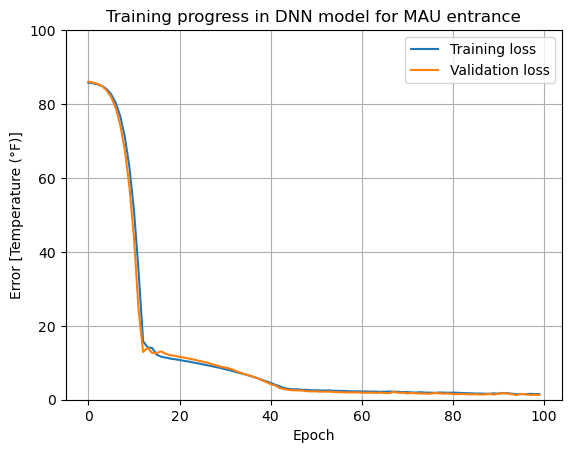

In [70]:
plot_loss(history_entrance)

In [71]:
def plot_loss(history_exit):
  plt.plot(history_exit.history['loss'], label='Training loss')
  plt.plot(history_exit.history['val_loss'], label='Validation loss')
  plt.ylim([0, 4])
  plt.xlim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Temperature (°F)]')
  plt.title('Training progress in DNN model for MAU exit')
  plt.legend()
  plt.grid(True)

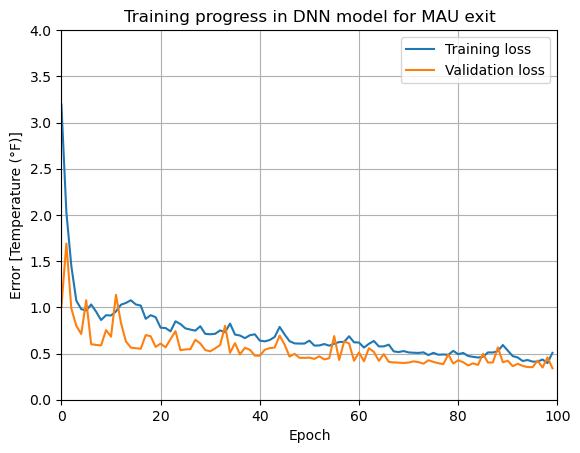

In [72]:

plot_loss(history_exit)

### Collect the results on the test set

#### MAU entrance

In [75]:
test_features_entrance = np.asarray(test_features_entrance).astype(np.float32)

In [76]:
test_results_entrance = {}
test_results_entrance['dnn_model'] = dnn_model.evaluate(test_features_entrance, test_labels_entrance, verbose=0)
test_results_entrance

{'dnn_model': 4.4129862785339355}

In [77]:
#original
ori_test_features_entrance = np.asarray(ori_test_features_entrance).astype(np.float32)
ori_test_features_entrance.shape

(3, 4)

In [78]:
ori_test_results_entrance = {}
ori_test_results_entrance['dnn_model'] = dnn_model.evaluate(ori_test_features_entrance, ori_test_labels_entrance, verbose=0)
ori_test_results_entrance

{'dnn_model': 6.489389896392822}

#### MAU exit

In [80]:
test_features_exit = np.asarray(test_features_exit).astype(np.float32)

In [81]:
test_results_exit = {}
test_results_exit['dnn_model'] = dnn_model.evaluate(test_features_exit, test_labels_exit, verbose=0)
test_results_exit

{'dnn_model': 0.3404204547405243}

In [82]:
#original
ori_test_features_exit = np.asarray(ori_test_features_exit).astype(np.float32)
ori_test_features_exit.shape

(3, 4)

In [83]:
ori_test_results_exit = {}
ori_test_results_exit['dnn_model'] = dnn_model.evaluate(ori_test_features_exit, ori_test_labels_exit, verbose=0)
ori_test_results_exit

{'dnn_model': 0.0921173095703125}

## Performance

In [85]:
pd.DataFrame(test_results_entrance, index=['Mean absolute error [Temperature]']).T

,Mean absolute error [Temperature]
dnn_model,4.412986


In [86]:
# original
pd.DataFrame(ori_test_results_entrance, index=['Mean absolute error [Temperature]']).T

,Mean absolute error [Temperature]
dnn_model,6.48939


In [87]:
pd.DataFrame(test_results_exit, index=['Mean absolute error [Temperature]']).T

,Mean absolute error [Temperature]
dnn_model,0.34042


In [88]:
#original
pd.DataFrame(ori_test_results_exit, index=['Mean absolute error [Temperature]']).T

,Mean absolute error [Temperature]
dnn_model,0.092117


### Make predictions

In [90]:
test_predictions_entrance = dnn_model.predict(test_features_entrance).flatten()
test_predictions_entrance

3/3 [==============================] - 0s 847us/step


array([77.89 , 88.072, 88.274, 88.476, 88.543, 88.947, 89.014, 89.216,
       88.888, 88.431, 88.126, 87.699, 87.721, 87.836, 87.858, 86.189,
       85.443, 83.206, 77.241, 72.767, 74.516, 75.057, 75.597, 76.137,
       77.759, 78.002, 82.558, 82.644, 81.619, 81.449, 81.622, 82.068,
       82.737, 84.075, 84.521, 85.706, 85.643, 85.516, 85.39 , 85.074,
       85.011, 84.506, 79.173, 79.435, 79.696, 81.523, 82.418, 82.502,
       82.552, 82.586, 82.687, 82.613, 82.023, 81.802, 81.655, 81.508,
       81.434, 81.26 , 81.395, 81.867, 82.137, 82.272, 82.339, 82.407,
       81.435, 80.987, 80.538, 80.314], dtype=float32)

In [91]:
# original
ori_test_predictions_entrance = dnn_model.predict(ori_test_features_entrance).flatten()
ori_test_predictions_entrance

1/1 [==============================] - 0s 7ms/step


array([72.067, 82.372, 82.597], dtype=float32)

In [92]:
test_predictions_exit = dnn_model.predict(test_features_exit).flatten()
test_predictions_exit

3/3 [==============================] - 0s 707us/step


array([74.988, 74.958, 75.083, 75.208, 75.25 , 75.501, 75.543, 75.668,
       76.002, 76.414, 76.689, 76.545, 76.361, 75.437, 75.252, 75.195,
       75.201, 75.217, 75.261, 75.294, 74.993, 74.926, 74.858, 74.79 ,
       74.588, 74.585, 74.621, 74.552, 74.235, 74.182, 74.23 , 74.364,
       74.565, 74.966, 75.1  , 75.47 , 75.462, 75.447, 75.432, 75.393,
       75.386, 75.324, 74.518, 74.563, 74.609, 74.928, 75.126, 75.216,
       75.269, 75.305, 75.412, 75.384, 75.017, 74.88 , 74.788, 74.696,
       74.65 , 74.522, 74.576, 74.767, 74.876, 74.931, 74.958, 74.985,
       75.259, 75.334, 75.41 , 75.448], dtype=float32)

In [93]:
# original
ori_test_predictions_exit = dnn_model.predict(ori_test_features_exit).flatten()
ori_test_predictions_exit

1/1 [==============================] - 0s 8ms/step


array([75.3  , 75.077, 75.062], dtype=float32)

In [94]:
error_entrance = test_predictions_entrance - test_labels_entrance
error_entrance

9     -1.796452
25     0.490708
28     0.549459
31     0.608225
32     0.627800
         ...   
315   -7.626952
323   -7.908848
325   -8.028986
327   -8.149123
328   -8.209203
Name: Temperature (Â°F), Length: 68, dtype: float64

In [95]:
# original
ori_error_entrance = ori_test_predictions_entrance - ori_test_labels_entrance
ori_error_entrance

5    -3.472571
12   -8.398349
15   -7.597236
Name: Temperature (°F), dtype: float64

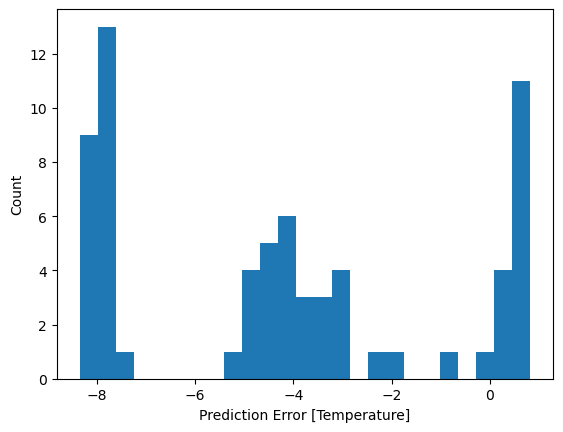

In [96]:
plt.hist(error_entrance, bins=25)
plt.xlabel('Prediction Error [Temperature]')
_ = plt.ylabel('Count')

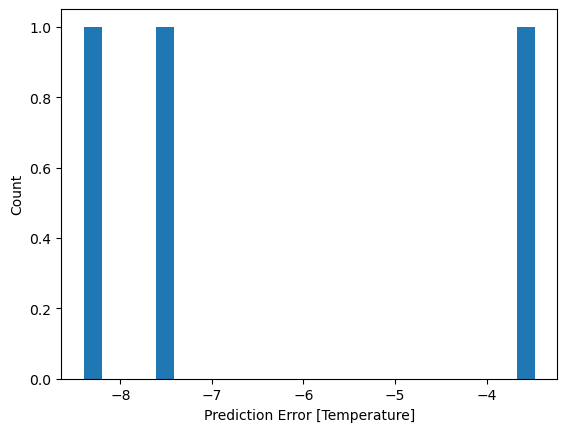

In [97]:
# original
plt.hist(ori_error_entrance, bins=25)
plt.xlabel('Prediction Error [Temperature]')
_ = plt.ylabel('Count')

In [98]:
error_exit = test_predictions_exit - test_labels_exit
error_exit


9     -0.027361
25    -0.045617
28     0.064397
31     0.174410
32     0.211083
         ...   
315   -0.151121
323    0.103693
325    0.176039
327    0.248378
328    0.284543
Name: Temperature (Â°F), Length: 68, dtype: float64

In [99]:
# original
ori_error_exit = ori_test_predictions_exit - ori_test_labels_exit
ori_error_exit

5     0.189576
12    0.002828
15   -0.083950
Name: Temperature (°F), dtype: float64

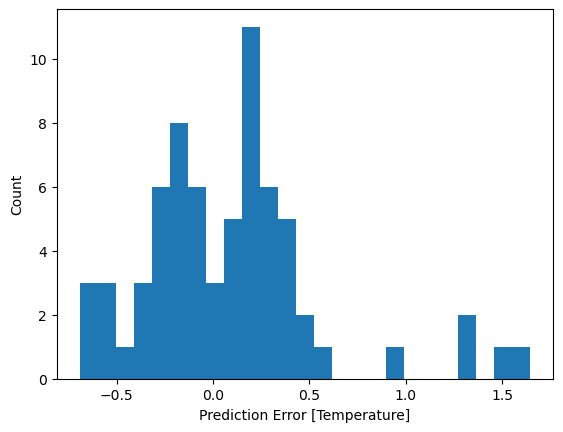

In [100]:
plt.hist(error_exit, bins=25)
plt.xlabel('Prediction Error [Temperature]')
_ = plt.ylabel('Count')

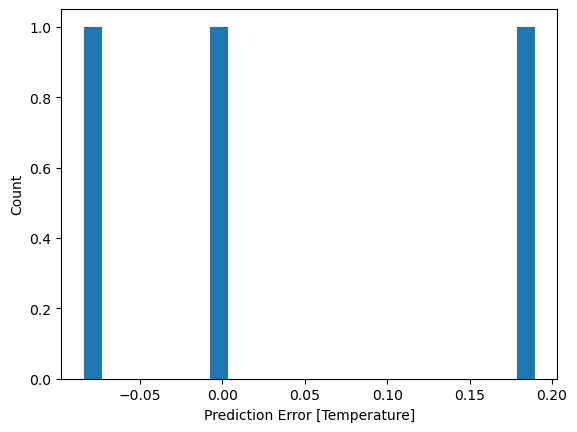

In [101]:
# original
plt.hist(ori_error_exit, bins=25)
plt.xlabel('Prediction Error [Temperature]')
_ = plt.ylabel('Count')

#### Average error (AE)

AE: Provide a measure of bias

In [104]:
average_error_entrance = np.mean(error_entrance)
print("Average error:", average_error_entrance)

Average error: -4.173657057012868


In [105]:
# original
ori_average_error_entrance = np.mean(ori_error_entrance)
print("Average error:", ori_average_error_entrance)

Average error: -6.4893857014973975


In [106]:
average_error_exit = np.mean(error_exit)
print("Average error:", average_error_exit)

Average error: 0.08173270334501356


In [107]:
# original
ori_average_error_exit = np.mean(ori_error_exit)
print("Average error:", ori_average_error_exit)

Average error: 0.03615122477213598


#### Mean squared error (MSE) and mean absolute error (MAE)

MSE: Penalize significant errors more heavily \
MAE: Provide a measure of the average magnitude of errors

In [110]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_labels_entrance, test_predictions_entrance)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_labels_entrance, test_predictions_entrance)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 27.807323543159487
Mean Absolute Error: 4.412984914955193


In [111]:
# original
ori_mse = mean_squared_error(ori_test_labels_entrance, ori_test_predictions_entrance)
ori_mae = mean_absolute_error(ori_test_labels_entrance, ori_test_predictions_entrance)
print("Mean Squared Error:", ori_mse)
print("Mean Absolute Error:", ori_mae)

Mean Squared Error: 46.76967466451324
Mean Absolute Error: 6.4893857014973975


In [112]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_labels_exit, test_predictions_exit)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_labels_exit, test_predictions_exit)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.22737315717287215
Mean Absolute Error: 0.3404208850965077


In [113]:
# original
ori_mse = mean_squared_error(ori_test_labels_exit, ori_test_predictions_exit)
ori_mae = mean_absolute_error(ori_test_labels_exit, ori_test_predictions_exit)
print("Mean Squared Error:", ori_mse)
print("Mean Absolute Error:", ori_mae)

Mean Squared Error: 0.01433153624631104
Mean Absolute Error: 0.09211798095703234


In [114]:
import numpy as np

def mean_absolute_percentage_error(y_actual, y_pred):
    y_actual, y_pred = np.array(y_actual), np.array(y_pred)
    return np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

mape = mean_absolute_percentage_error(test_labels_entrance, test_predictions_entrance)
print(f'MAPE: {mape:.2f}%')

MAPE: 5.02%


In [115]:
# original
mape = mean_absolute_percentage_error(ori_test_labels_entrance, ori_test_predictions_entrance)
print(f'MAPE: {mape:.2f}%')

MAPE: 7.42%


In [116]:
mape = mean_absolute_percentage_error(test_labels_exit, test_predictions_exit)
print(f'MAPE: {mape:.2f}%')

MAPE: 0.45%


In [117]:
mape = mean_absolute_percentage_error(ori_test_labels_exit, ori_test_predictions_exit)
print(f'MAPE: {mape:.2f}%')

MAPE: 0.12%


# Optuna

[I 2024-10-24 19:58:36,502] A new study created in memory with name: no-name-958c5e74-92dd-4fa0-a0f2-d6c101607358
/var/folders/2z/b1lzf17n4z90pz80khfc42fw0000gp/T/ipykernel_6383/147589441.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
[I 2024-10-24 19:58:38,864] Trial 0 finished with value: 1.5924825817346573 and parameters: {'num_layers': 1, 'num_neurons_layer_0': 112, 'learning_rate': 0.0005006727798164402, 'activation': 'relu'}. Best is trial 0 with value: 1.5924825817346573.
/var/folders/2z/b1lzf17n4z90pz80khfc42fw0000gp/T/ipykernel_6383/147589441.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) in

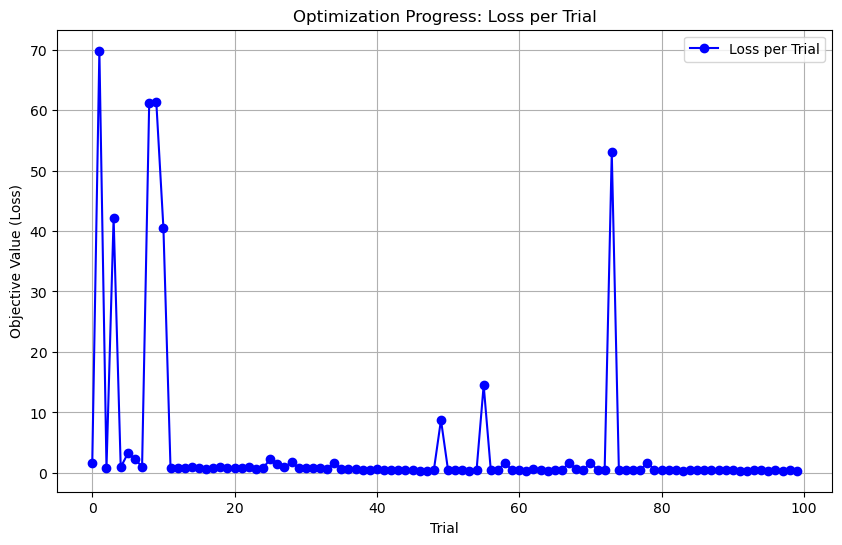

Best hyperparameters:  {'num_layers': 1, 'num_neurons_layer_0': 104, 'learning_rate': 0.005410490232028349, 'activation': 'tanh'}
Best trial loss:  0.36320966109633446
Epoch 1/50
9/9 [==============================] - 0s 787us/step - loss: 82.4290
Epoch 2/50
9/9 [==============================] - 0s 687us/step - loss: 74.7908
Epoch 3/50
9/9 [==============================] - 0s 589us/step - loss: 68.8738
Epoch 4/50
9/9 [==============================] - 0s 495us/step - loss: 63.8015
Epoch 5/50
9/9 [==============================] - 0s 557us/step - loss: 58.7466
Epoch 6/50
9/9 [==============================] - 0s 620us/step - loss: 53.5475
Epoch 7/50
9/9 [==============================] - 0s 629us/step - loss: 48.3059
Epoch 8/50
9/9 [==============================] - 0s 606us/step - loss: 43.0615
Epoch 9/50
9/9 [==============================] - 0s 524us/step - loss: 37.8262
Epoch 10/50
9/9 [==============================] - 0s 531us/step - loss: 32.6025
Epoch 11/50
9/9 [==============

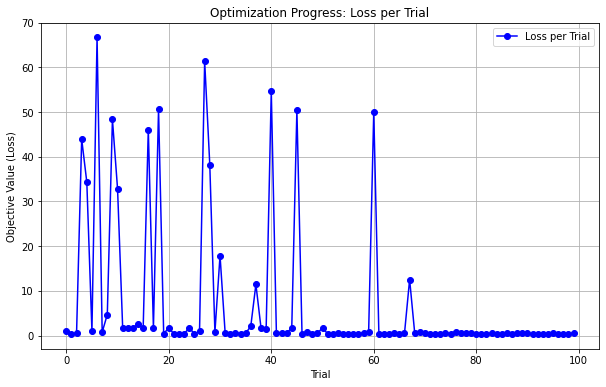

Best hyperparameters:  {'num_layers': 1, 'num_neurons_layer_0': 84, 'learning_rate': 0.005292881562622825, 'activation': 'tanh'}
Best trial loss:  0.36439890041947365
Epoch 1/50
9/9 [==============================] - 0s 994us/step - loss: 82.8630
Epoch 2/50
9/9 [==============================] - 0s 750us/step - loss: 76.9507
Epoch 3/50
9/9 [==============================] - 0s 750us/step - loss: 72.1721
Epoch 4/50
9/9 [==============================] - 0s 750us/step - loss: 68.2158
Epoch 5/50
9/9 [==============================] - 0s 750us/step - loss: 64.1739
Epoch 6/50
9/9 [==============================] - 0s 750us/step - loss: 60.0504
Epoch 7/50
9/9 [==============================] - 0s 750us/step - loss: 55.9062
Epoch 8/50
9/9 [==============================] - 0s 750us/step - loss: 51.7634
Epoch 9/50
9/9 [==============================] - 0s 750us/step - loss: 47.6283
Epoch 10/50
9/9 [==============================] - 0s 750us/step - loss: 43.5019
Epoch 11/50
9/9 [===============

In [119]:
import optuna
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

trial_losses = []

# Function to create a model with the given hyperparameters
# Function to create a model with a specific number of neurons in each layer
def create_model(input_shape, neurons_per_layer, activation, learning_rate):
    model = tf.keras.Sequential()
    
    # Add the first layer with input shape
    model.add(layers.Dense(neurons_per_layer[0], activation=activation, input_shape=(input_shape,)))
    
    # Add subsequent layers with specified number of neurons
    for neurons in neurons_per_layer[1:]:
        model.add(layers.Dense(neurons, activation=activation))
    
    model.add(layers.Dense(1))  # Output layer
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                  loss='mean_absolute_error')
    return model

# Objective function to optimize both entrance and exit models
def objective(trial):
    # Suggest number of layers
    num_layers = trial.suggest_int('num_layers', 1, 5)
    
    # Suggest a different number of neurons for each layer
    neurons_per_layer = []
    for i in range(num_layers):
        neurons = trial.suggest_int(f'num_neurons_layer_{i}', 16, 128, step=4)  # Each layer can have 16 to 128 neurons
        neurons_per_layer.append(neurons)
    
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])

    # Create models for both entrance and exit
    model_entrance = create_model(train_features_entrance.shape[1], neurons_per_layer, activation, learning_rate)
    model_exit = create_model(train_features_exit.shape[1], neurons_per_layer, activation, learning_rate)

    # Split data into training and validation for both entrance and exit
    x_train_entrance, x_val_entrance, y_train_entrance, y_val_entrance = train_test_split(train_features_entrance, train_labels_entrance, test_size=0.2, random_state=42)
    x_train_exit, x_val_exit, y_train_exit, y_val_exit = train_test_split(train_features_exit, train_labels_exit, test_size=0.2, random_state=42)

    # Train both models
    model_entrance.fit(x_train_entrance, y_train_entrance, validation_data=(x_val_entrance, y_val_entrance), 
                       epochs=100, batch_size=32, verbose=0)
    model_exit.fit(x_train_exit, y_train_exit, validation_data=(x_val_exit, y_val_exit), 
                   epochs=100, batch_size=32, verbose=0)

    # Evaluate both models on validation data
    val_loss_entrance = model_entrance.evaluate(x_val_entrance, y_val_entrance, verbose=0)
    val_loss_exit = model_exit.evaluate(x_val_exit, y_val_exit, verbose=0)

    # Combine the two objectives by returning a weighted sum
    combined_loss = 0.5 * val_loss_entrance + 0.5 * val_loss_exit
    trial_losses.append(combined_loss)  # Append the loss to the list
    
    return combined_loss

# Create a study and optimize both models simultaneously
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(trial_losses, label='Loss per Trial', marker='o', color='blue')
plt.title('Optimization Progress: Loss per Trial')
plt.xlabel('Trial')
plt.ylabel('Objective Value (Loss)')
plt.legend()
plt.grid(True)
plt.show()

# Print best hyperparameters
print("Best hyperparameters: ", study.best_params)
print("Best trial loss: ", study.best_value)

# Build the final optimized models
def build_best_model(best_params, input_shape):
    num_layers = best_params['num_layers']
    
    # Reconstruct neurons per layer using the best parameters
    neurons_per_layer = [best_params[f'num_neurons_layer_{i}'] for i in range(num_layers)]
    activation = best_params['activation']
    learning_rate = best_params['learning_rate']

    model = create_model(input_shape, neurons_per_layer, activation, learning_rate)
    return model

# Create the final models using the best hyperparameters
final_model_entrance = build_best_model(study.best_params, train_features_entrance.shape[1])
final_model_exit = build_best_model(study.best_params, train_features_exit.shape[1])


# Train the final models on the full datasets
final_model_entrance.fit(train_features_entrance, train_labels_entrance, epochs=50, batch_size=32, verbose=1)
final_model_exit.fit(train_features_exit, train_labels_exit, epochs=50, batch_size=32, verbose=1)




3/3 [==============================] - 0s 773us/step - loss: 0.6612
Test set loss for entrance: 0.6612163782119751
3/3 [==============================] - 0s 870us/step - loss: 0.0869
Test set loss for exit: 0.0869249477982521
1/1 [==============================] - 0s 9ms/step - loss: 0.4418
v2. Test set loss for entrance: 0.44183602929115295
1/1 [==============================] - 0s 8ms/step - loss: 0.0251
v2. Test set loss for exit: 0.025054931640625
Test features Entrance: [[27.114  6.637 41.253  5.672]
 [20.427  6.524 45.683  5.674]
 [20.362  6.536 45.788  5.686]
 [20.297  6.547 45.893  5.697]
 [20.275  6.551 45.928  5.701]
 [20.145  6.573 46.137  5.723]
 [20.123  6.577 46.172  5.727]
 [20.058  6.589 46.277  5.739]
 [20.115  6.559 46.094  5.709]
 [20.2    6.52  45.839  5.67 ]
 [20.257  6.493 45.669  5.643]
 [20.435  6.468 45.451  5.618]
 [20.462  6.474 45.47   5.624]
 [20.594  6.502 45.564  5.652]
 [20.62   6.508 45.583  5.658]
 [21.527  6.503 44.819  5.639]
 [21.926  6.499 44.476  

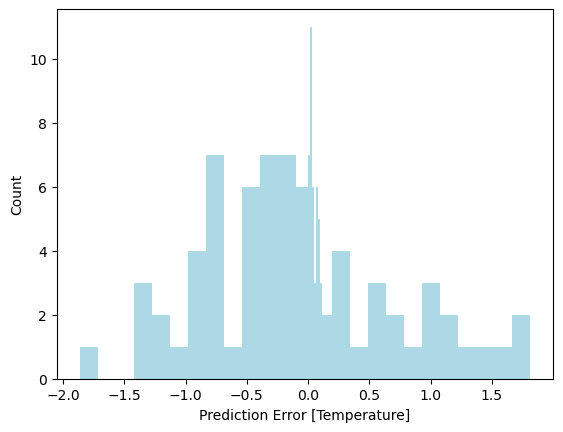

In [120]:
# Optionally, evaluate on a test set (if you have one)
test_loss_entrance = final_model_entrance.evaluate(test_features_entrance, test_labels_entrance, verbose=1)
print(f"Test set loss for entrance: {test_loss_entrance}")
test_loss_exit = final_model_exit.evaluate(test_features_exit, test_labels_exit, verbose=1)
print(f"Test set loss for exit: {test_loss_exit}")

ori_test_loss_entrance = final_model_entrance.evaluate(ori_test_features_entrance, ori_test_labels_entrance, verbose=1)
print(f"v2. Test set loss for entrance: {ori_test_loss_entrance}")
ori_test_loss_exit = final_model_exit.evaluate(ori_test_features_exit, ori_test_labels_exit, verbose=1)
print(f"v2. Test set loss for exit: {ori_test_loss_exit}")

#----------------------
test_features_entrance = np.asarray(test_features_entrance).astype(np.float32)
print("Test features Entrance:", test_features_entrance)
print()

ori_test_features_entrance = np.asarray(ori_test_features_entrance).astype(np.float32)
print("v2. Test features Entrance:", ori_test_features_entrance)
print()

#----------------------
test_results_entrance = {}
test_results_entrance['dnn_model'] = final_model_entrance.evaluate(test_features_entrance, test_labels_entrance, verbose=0)
print("Test result Entrance:", test_results_entrance)
print()

ori_test_results_entrance = {}
ori_test_results_entrance['dnn_model'] = final_model_entrance.evaluate(ori_test_features_entrance, ori_test_labels_entrance, verbose=0)
print("v2. Test result Entrance:", ori_test_results_entrance)
print()

#----------------------
test_features_exit = np.asarray(test_features_exit).astype(np.float32)
print("Test features Exit:", test_features_exit)
print()

ori_test_features_exit = np.asarray(ori_test_features_exit).astype(np.float32)
print("v2. Test features Exit:", ori_test_features_exit)

#----------------------
test_results_exit = {}
test_results_exit['dnn_model'] = final_model_exit.evaluate(test_features_exit, test_labels_exit, verbose=0)
print("Test result Exit:", test_results_exit)
print()

ori_test_results_exit = {}
ori_test_results_exit['dnn_model'] = final_model_exit.evaluate(ori_test_features_exit, ori_test_labels_exit, verbose=0)
print("v2. Test result Exit:", ori_test_results_exit)
print()

#----------------------
pd.DataFrame(test_results_entrance, index=['Mean absolute error [Temperature]']).T

pd.DataFrame(test_results_exit, index=['Mean absolute error [Temperature]']).T

pd.DataFrame(ori_test_results_entrance, index=['Mean absolute error [Temperature]']).T

pd.DataFrame(ori_test_results_exit, index=['Mean absolute error [Temperature]']).T

#----------------------
test_predictions_entrance = final_model_entrance.predict(test_features_entrance).flatten()
print("Test Predictions Entrance:", test_predictions_entrance)
print()

test_predictions_exit = final_model_exit.predict(test_features_exit).flatten()
print("Test Predictions Exit:", test_predictions_exit)
print()

ori_test_predictions_entrance = final_model_entrance.predict(ori_test_features_entrance).flatten()
print("v2. Test Predictions Entrance:", ori_test_predictions_entrance)
print()

ori_test_predictions_exit = final_model_exit.predict(ori_test_features_exit).flatten()
print("v2. Test Predictions Exit:", ori_test_predictions_exit)
print()

#----------------------
error_entrance = test_predictions_entrance - test_labels_entrance
print("Error entrance:", error_entrance)
print()

error_exit = test_predictions_entrance - test_labels_entrance
print("Error exit:", error_exit)
print()

ori_error_entrance = ori_test_predictions_entrance - ori_test_labels_entrance
print("v2. Error entrance:", ori_error_entrance)
print()

ori_error_exit = ori_test_predictions_entrance - ori_test_labels_entrance
print("v2. Error exit:", ori_error_exit)
print()

#----------------------
plt.hist(error_entrance, bins=25, color='lightblue')
plt.xlabel('Prediction Error [Temperature]')
_ = plt.ylabel('Count')

error_exit = test_predictions_exit - test_labels_exit
error_exit

plt.hist(error_exit, bins=25, color='lightblue')
plt.xlabel('Prediction Error [Temperature]')
_ = plt.ylabel('Count')

# average error
average_error_entrance = np.mean(error_entrance)
print("Average error for entrance:", average_error_entrance)
print()

average_error_exit = np.mean(error_exit)
print("Average error for exit:", average_error_exit)
print()

ori_average_error_entrance = np.mean(ori_error_entrance)
print("v2. Average error for entrance:", ori_average_error_entrance)
print()

ori_average_error_exit = np.mean(ori_error_exit)
print("v2. Average error for exit:", ori_average_error_exit)
print()

# mean squared error
from sklearn.metrics import mean_squared_error
mse_entrance = mean_squared_error(test_labels_entrance, test_predictions_entrance)
mse_exit = mean_squared_error(test_labels_exit, test_predictions_exit)
print("Mean Squared Error for entrance:", mse_entrance)
print("Mean Squared Error for exit:", mse_exit)
print()

from sklearn.metrics import mean_squared_error
ori_mse_entrance = mean_squared_error(ori_test_labels_entrance, ori_test_predictions_entrance)
ori_mse_exit = mean_squared_error(ori_test_labels_exit, ori_test_predictions_exit)
print("v2. Mean Squared Error for entrance:", ori_mse_entrance)
print("v2. Mean Squared Error for exit:", ori_mse_exit)
print()

# mean absolute error
from sklearn.metrics import mean_absolute_error
mae_entrance = mean_absolute_error(test_labels_entrance, test_predictions_entrance)
mae_exit = mean_absolute_error(test_labels_exit, test_predictions_exit)
print("Mean Absolute Error for entrance:", mae_entrance)
print("Mean Absolute Error for exit:", mae_exit)
print()


from sklearn.metrics import mean_absolute_error
ori_mae_entrance = mean_absolute_error(ori_test_labels_entrance, ori_test_predictions_entrance)
ori_mae_exit = mean_absolute_error(ori_test_labels_exit, ori_test_predictions_exit)
print("v2. Mean Absolute Error for entrance:", ori_mae_entrance)
print("v2. Mean Absolute Error for exit:", ori_mae_exit)
print()


import numpy as np

def mean_absolute_percentage_error(y_actual, y_pred):
    y_actual, y_pred = np.array(y_actual), np.array(y_pred)
    return np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

mape = mean_absolute_percentage_error(test_labels_entrance, test_predictions_entrance)
print(f'MAPE for entrance: {mape:.2f}%')

mape = mean_absolute_percentage_error(test_labels_exit, test_predictions_exit)
print(f'MAPE for exit: {mape:.2f}%')

ori_mape = mean_absolute_percentage_error(ori_test_labels_entrance, ori_test_predictions_entrance)
print(f'v2. MAPE for entrance: {ori_mape:.2f}%')

ori_mape = mean_absolute_percentage_error(ori_test_labels_exit, ori_test_predictions_exit)
print(f'v2. MAPE for exit: {ori_mape:.2f}%')

In [121]:
print("Trial Losses (Objective Values) as a Column:")
for i, loss in enumerate(trial_losses):
    print(f"{i + 1}|{loss}")

Trial Losses (Objective Values) as a Column:
1|1.5924825817346573
2|69.81199645996094
3|0.8460460007190704
4|42.12613487243652
5|0.9309985935688019
6|3.2236512415111065
7|2.3445650413632393
8|0.9794989228248596
9|61.12971496582031
10|61.31773567199707
11|40.47855257987976
12|0.7521409243345261
13|0.8069053888320923
14|0.8161766976118088
15|1.001971498131752
16|0.8187957108020782
17|0.6536020636558533
18|0.740941196680069
19|0.996908500790596
20|0.8709353506565094
21|0.792401134967804
22|0.8577585518360138
23|0.9384611546993256
24|0.6844347715377808
25|0.8006107807159424
26|2.2753272652626038
27|1.4790867865085602
28|1.0277387499809265
29|1.7240327894687653
30|0.8550821542739868
31|0.8079227805137634
32|0.7970000654459
33|0.7921300828456879
34|0.6763487309217453
35|1.7124363109469414
36|0.6810104548931122
37|0.6760101318359375
38|0.6615772470831871
39|0.4670785516500473
40|0.443444199860096
41|0.5821045413613319
42|0.48143240064382553
43|0.5239483863115311
44|0.5051498264074326
45|0.475